In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_log_error as msle, mean_squared_error as mse, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Reading the pre-processed dataset
df = pd.read_csv('Ecommerce_PreProcessing.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN
0,536365,3536,3919,6,2016-11-29,2.55,4047,36,2016,11,29,1,4,9
1,536365,2794,3927,6,2016-11-29,3.39,4047,36,2016,11,29,1,4,9
2,536365,3044,913,8,2016-11-29,2.75,4047,36,2016,11,29,1,4,9
3,536365,2985,1910,6,2016-11-29,3.39,4047,36,2016,11,29,1,4,9
4,536365,2984,2911,6,2016-11-29,3.39,4047,36,2016,11,29,1,4,9


In [3]:
df = df[['StockCode',	'Quantity',	'Invoice_year', 'Invoice_month', 'Invoice_DoM',	'UnitPrice',	'CustomerID',	'Country']]

In [4]:
df.head()

,StockCode,Quantity,Invoice_year,Invoice_month,Invoice_DoM,UnitPrice,CustomerID,Country
0,3536,6,2016,11,29,2.55,4047,36
1,2794,6,2016,11,29,3.39,4047,36
2,3044,8,2016,11,29,2.75,4047,36
3,2985,6,2016,11,29,3.39,4047,36
4,2984,6,2016,11,29,3.39,4047,36


In [5]:
df.shape

(541895, 8)

In [6]:
df.dropna(inplace=True)
df.shape

(541895, 8)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(df)

K-Means Clustering

In [8]:
SSE_scaled = []

In [9]:
from sklearn.cluster import KMeans
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

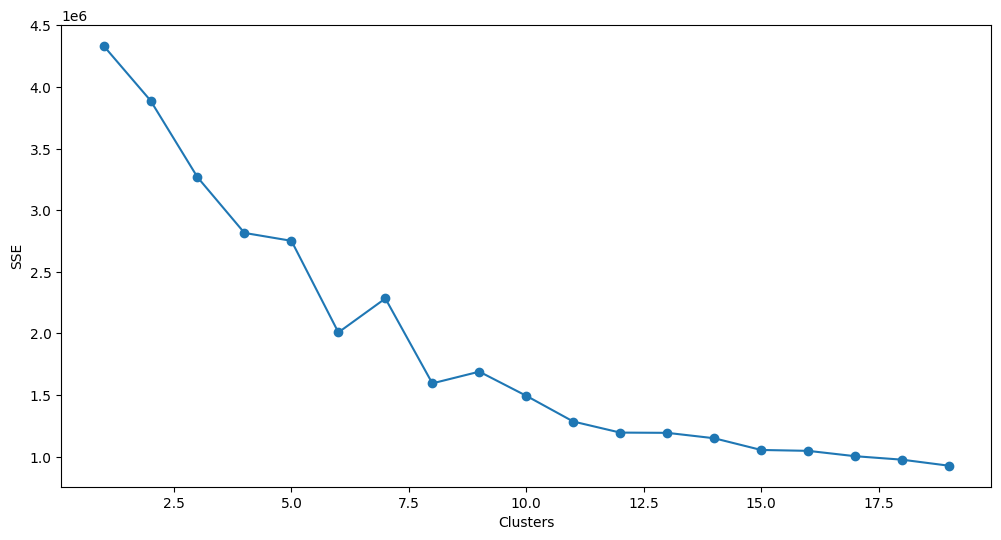

In [10]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

In [11]:
kmeans = KMeans( n_clusters = 7, random_state= 42)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [12]:
pred

array([2, 2, 2, ..., 6, 6, 6], dtype=int32)

In [13]:
frame = pd.DataFrame(data_scaled)

In [14]:
frame['cluster'] = pred

In [15]:
frame['cluster'].value_counts()

,count
cluster,
5,157637
0,155837
1,150817
2,40818
6,31340
3,5410
4,36


In [16]:
frame.head()

,0,1,2,3,4,5,6,7,cluster
0,2.021276,-0.020466,-3.428903,1.003361,1.593456,-0.031357,0.916737,0.279655,2
1,1.225784,-0.020466,-3.428903,1.003361,1.593456,-0.016333,0.916737,0.279655,2
2,1.493807,-0.007804,-3.428903,1.003361,1.593456,-0.027780,0.916737,0.279655,2
3,1.430553,-0.020466,-3.428903,1.003361,1.593456,-0.016333,0.916737,0.279655,2
4,1.429481,-0.020466,-3.428903,1.003361,1.593456,-0.016333,0.916737,0.279655,2


Highly Valued Customers

In [17]:
# Identify the cluster with the least number of customers
cluster_counts = frame['cluster'].value_counts()

# Find the cluster(s) with the least number of members
least_members = cluster_counts.idxmin()
highly_valued_customers_count = cluster_counts[least_members]

print(f"The number of highly valued customers is: {highly_valued_customers_count}")


The number of highly valued customers is: 36
